# Feedforward Neural Networks (FNN)
In this we are gona build a FNN Neural Network from scratch

In [2]:
# load the dataset , MNIST
from tensorflow.keras.datasets import mnist

# load impoert lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
(X_train ,y_train ), (X_test  , y_test) = mnist.load_data()
X_train.shape



(60000, 28, 28)

5


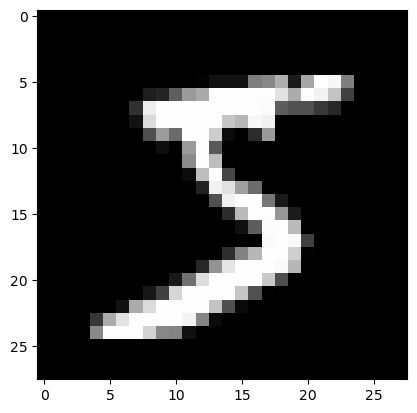

In [4]:
plt.imshow(X_train[0], cmap='gray')
print(y_train[0])

In [5]:
# Normalise the 
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_train = X_train/255.0

X_test = X_test.reshape(X_test.shape[0], 28*28)
X_test = X_test/255.0

X_train.shape # Now data is readdy for 1D input to the model

(60000, 784)

In [6]:
y_train.shape # already in one dimentional format
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10) 

y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [7]:
# Defining Activation Funtion

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return x  > 0

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

In [8]:
#Initlaise the waits and biases

input_size  , hidden_size, output_size = 784, 128, 10
np.random.seed(42)  # For reproducibility

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [9]:
def cross_entropy_loss(predictions, targets):
    return -np.mean(np.sum(targets * np.log(predictions + 1e-9), axis=1))

learning_rate = 0.01
epochs = 10
batch_size = 64

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward Pass
        z1 = X_batch.dot(W1) + b1
        a1 = relu(z1)
        z2 = a1.dot(W2) + b2
        output = softmax(z2)

        # Loss
        loss = cross_entropy_loss(output, y_batch)

        # Backward Pass
        error = output - y_batch
        dW2 = a1.T.dot(error)
        db2 = np.sum(error, axis=0, keepdims=True)

        delta1 = error.dot(W2.T) * relu_derivative(z1)
        dW1 = X_batch.T.dot(delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        # Update weights
        W2 -= learning_rate * dW2 / batch_size
        b2 -= learning_rate * db2 / batch_size
        W1 -= learning_rate * dW1 / batch_size
        b1 -= learning_rate * db1 / batch_size

    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

    

Epoch 1, Loss: 1.0042
Epoch 2, Loss: 0.3886
Epoch 3, Loss: 0.2603
Epoch 4, Loss: 0.2072
Epoch 5, Loss: 0.1786
Epoch 6, Loss: 0.1608
Epoch 7, Loss: 0.1483
Epoch 8, Loss: 0.1382
Epoch 9, Loss: 0.1296
Epoch 10, Loss: 0.1230


In [10]:
def accuracy(X, y):
    z1 = X.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    predictions = np.argmax(softmax(z2), axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(predictions == labels)

print("Test Accuracy:", accuracy(X_test, y_test))


Test Accuracy: 0.9248


In [11]:
# Now we have W1 , b1 and W2 , b2
# now made a calss for the model
class DigitRecognition:
    def __init__(self):
        self.input_size = 784
        self.hidden_size = 128
        self.output_size = 10
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
    def relu(self, x):
        return np.maximum(0, x)
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=1, keepdims=True)
    def predict(self , X):
        
        z1 = X.dot(self.W1) + self.b1
        a1 = relu(z1)
        z2 = a1.dot(self.W2) + self.b2
        output = softmax(z2)
        return np.argmax(output, axis=1)

In [22]:
model = DigitRecognition()
# Test the model with a sample input
sample_input = X_test[99].reshape(1, -1)  # Reshape
model.predict(sample_input)


array([9], dtype=int64)

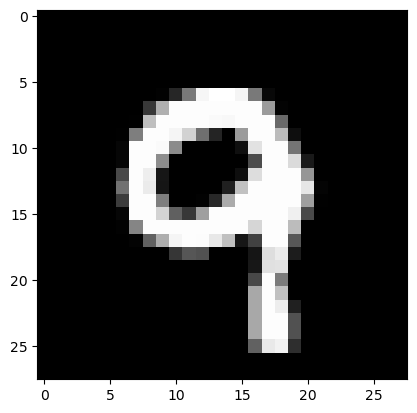

In [23]:
plt.imshow((X_test[99].reshape(28 , 28)), cmap=('gray'))
plt.show()

In [19]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [20]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

[9]


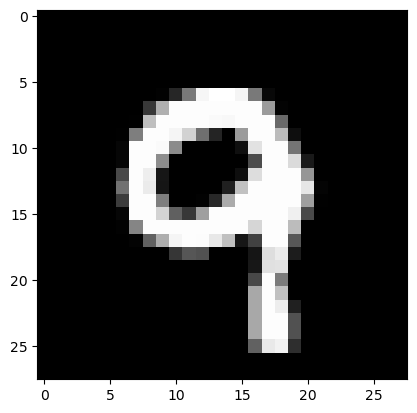

In [24]:
print(loaded_model.predict(sample_input))
plt.imshow((X_test[99].reshape(28 , 28)), cmap=('gray'))    

In [21]:
np.save('W1.npy', W1)
np.save('b1.npy', b1)
np.save('W2.npy', W2)
np.save('b2.npy', b2)